In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

df_d = pd.read_csv('size_1000_n_5_sepval_0.1.csv')
df_b = pd.read_csv("hf://datasets/mltrev23/wine-clustering/wine-clustering.csv")

scaler = StandardScaler()
X_d = scaler.fit_transform(df_d[['x', 'y']])
X_b = scaler.fit_transform(df_b.select_dtypes(include=np.number))

pca = PCA(n_components=2)
X_b_pca = pca.fit_transform(X_b)


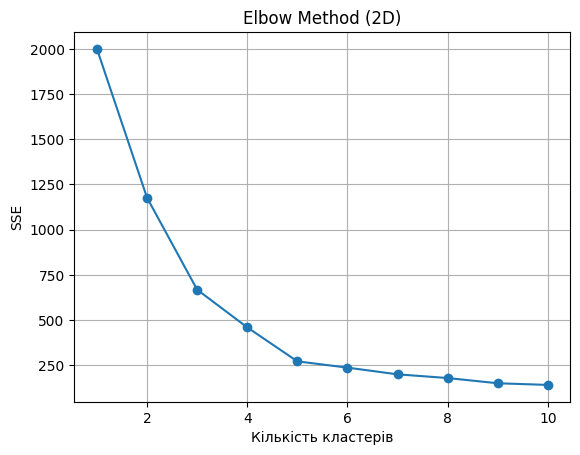

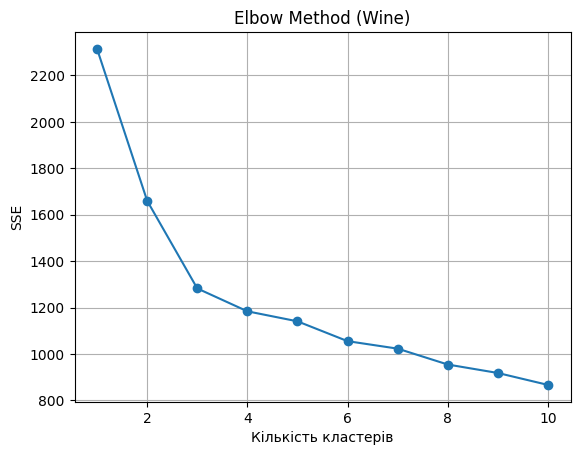

In [16]:
sse_d = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(X_d)
    sse_d.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), sse_d, marker='o')
plt.title('Elbow Method (2D)')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.grid()
plt.show()

sse_b = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(X_b)
    sse_b.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), sse_b, marker='o')
plt.title('Elbow Method (Wine)')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.grid()
plt.show()


Silhouette (2D): 0.5458695136189783


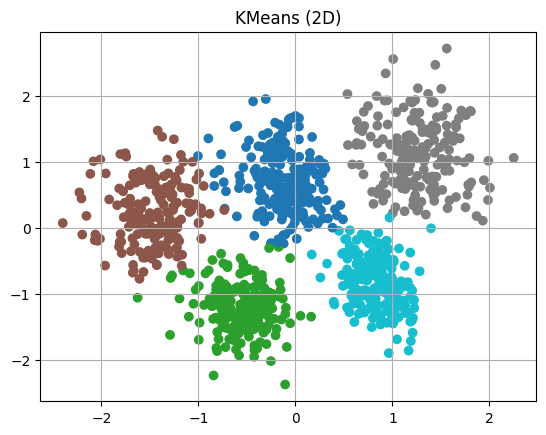

Silhouette (Wine): 0.2828367184667964


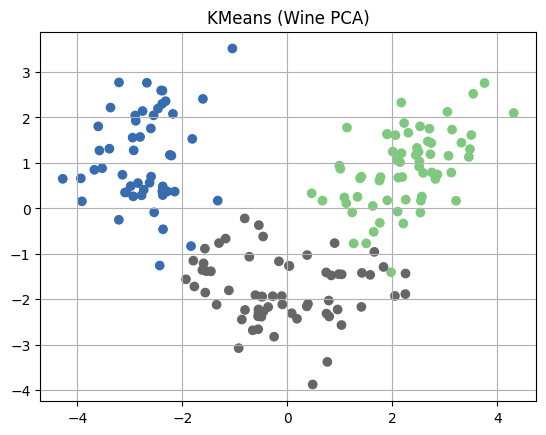

In [17]:
kmeans_d = KMeans(n_clusters=5)
labels_km_d = kmeans_d.fit_predict(X_d)
print("Silhouette (2D):", silhouette_score(X_d, labels_km_d))

plt.figure()
plt.scatter(X_d[:, 0], X_d[:, 1], c=labels_km_d, cmap='tab10')
plt.title("KMeans (2D)")
plt.grid()
plt.show()

kmeans_b = KMeans(n_clusters=3)
labels_km_b = kmeans_b.fit_predict(X_b)
print("Silhouette (Wine):", silhouette_score(X_b, labels_km_b))

plt.figure()
plt.scatter(X_b_pca[:, 0], X_b_pca[:, 1], c=labels_km_b, cmap='Accent')
plt.title("KMeans (Wine PCA)")
plt.grid()
plt.show()


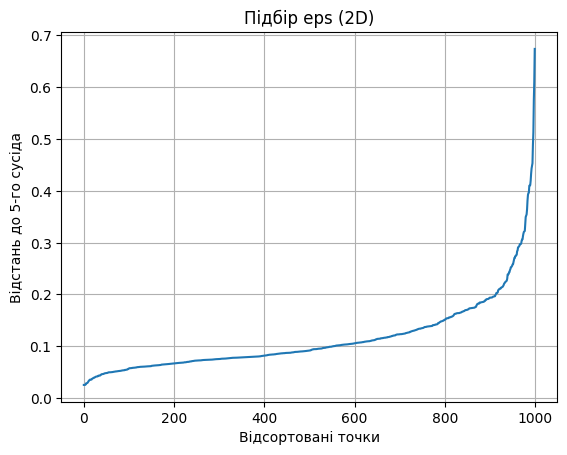

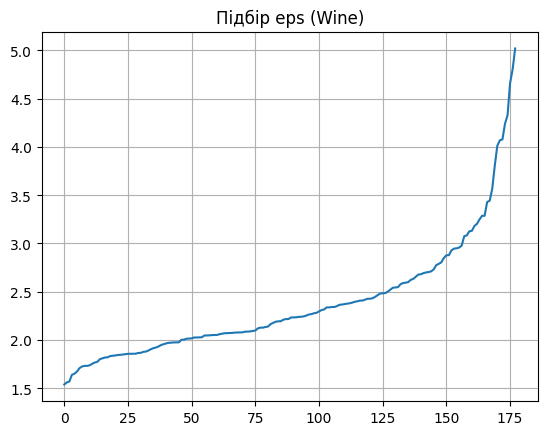

In [18]:
neighbors_2d = NearestNeighbors(n_neighbors=5).fit(X_d)
distances_2d, _ = neighbors_2d.kneighbors(X_d)

distances_2d = np.sort(distances_2d[:, 4])

plt.figure()
plt.plot(distances_2d)
plt.title("Підбір eps (2D)")
plt.ylabel("Відстань до 5-го сусіда")
plt.xlabel("Відсортовані точки")
plt.grid()
plt.show()

neighbors = NearestNeighbors(n_neighbors=5).fit(X_b)
distances, _ = neighbors.kneighbors(X_b)
distances = np.sort(distances[:, 4])
plt.figure()
plt.plot(distances)
plt.title("Підбір eps (Wine)")
plt.grid()
plt.show()


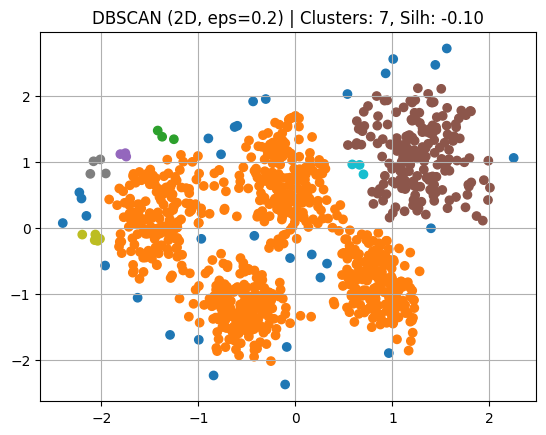

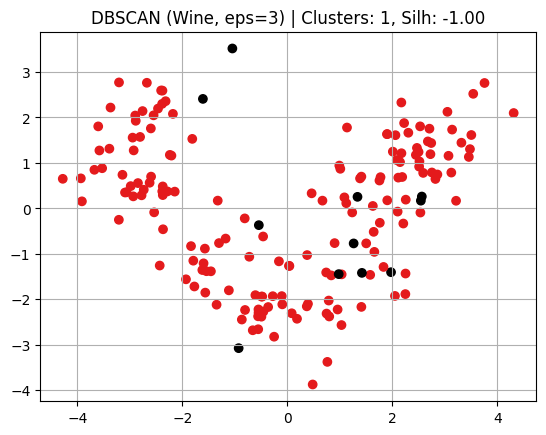

In [19]:
eps_range = [2, 3, 4, 5]
eps = 0.2
db_d = DBSCAN(eps=eps, min_samples=3).fit(X_d)
labels_d = db_d.labels_
n_clusters_d = len(set(labels_d)) - (1 if -1 in labels_d else 0)
score_d = silhouette_score(X_d, labels_d) if n_clusters_d > 1 else -1

plt.figure()
plt.scatter(X_d[:, 0], X_d[:, 1], c=labels_d, cmap='tab10')
plt.title(f"DBSCAN (2D, eps={eps}) | Clusters: {n_clusters_d}, Silh: {score_d:.2f}")
plt.grid()\
plt.show()


eps = 3
db_b = DBSCAN(eps=eps, min_samples=5).fit(X_b)
labels_b = db_b.labels_
n_clusters_b = len(set(labels_b)) - (1 if -1 in labels_b else 0)
score_b = silhouette_score(X_b, labels_b) if n_clusters_b > 1 else -1

colors = ['black' if l == -1 else plt.cm.Set1(l % 9) for l in labels_b]
plt.figure()
plt.scatter(X_b_pca[:, 0], X_b_pca[:, 1], c=colors)
plt.title(f"DBSCAN (Wine, eps={eps}) | Clusters: {n_clusters_b}, Silh: {score_b:.2f}")
plt.grid()
plt.show()


Silhouette (Agglo 2D): 0.5383626078765015


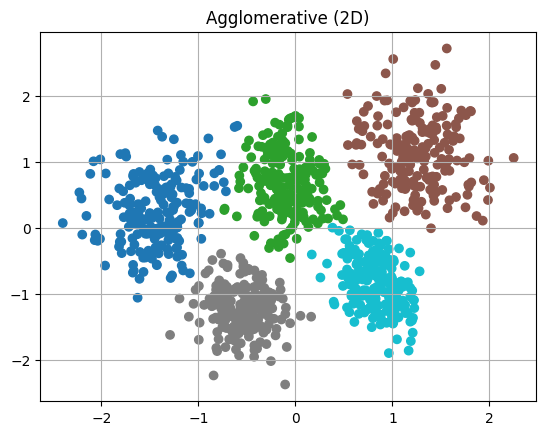

Silhouette (Agglo Wine): 0.2774439826952265


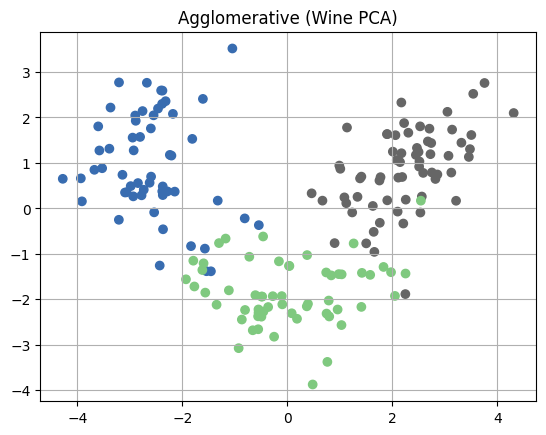

In [20]:
agg_d = AgglomerativeClustering(n_clusters=5)
labels_ag_d = agg_d.fit_predict(X_d)
print("Silhouette (Agglo 2D):", silhouette_score(X_d, labels_ag_d))

plt.figure()
plt.scatter(X_d[:, 0], X_d[:, 1], c=labels_ag_d, cmap='tab10')
plt.title("Agglomerative (2D)")
plt.grid()
plt.show()

agg_b = AgglomerativeClustering(n_clusters=3)
labels_ag_b = agg_b.fit_predict(X_b)
print("Silhouette (Agglo Wine):", silhouette_score(X_b, labels_ag_b))

plt.figure()
plt.scatter(X_b_pca[:, 0], X_b_pca[:, 1], c=labels_ag_b, cmap='Accent')
plt.title("Agglomerative (Wine PCA)")
plt.grid()
plt.show()


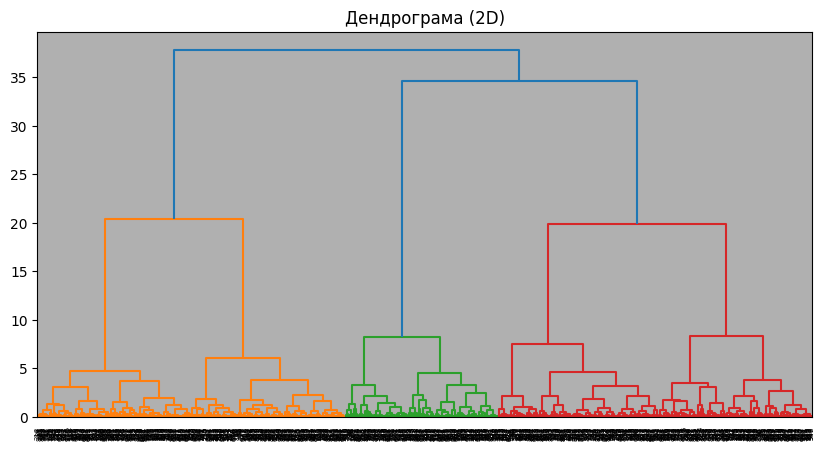

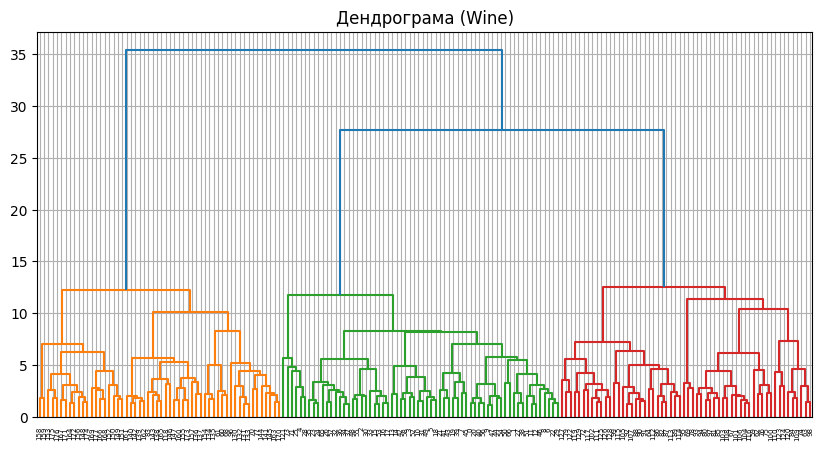

In [21]:
linked_d = linkage(X_d, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked_d)
plt.title("Дендрограма (2D)")
plt.grid()
plt.show()

linked_b = linkage(X_b, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked_b)
plt.title("Дендрограма (Wine)")
plt.grid()
plt.show()
